## Imports

In [19]:
from vizdoom import DoomGame
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from collections import deque
import torch.nn as nn
from torch.autograd import Variable
import torch
import torch.nn.functional as F

## Test Doom Environment

In [4]:
def test_environment():
    game = DoomGame()
    game.load_config("basic.cfg")
    game.set_doom_scenario_path("basic.wad")
    game.init()
    shoot = [0, 0, 1]
    left = [1, 0, 0]
    right = [0, 1, 0]
    actions = [shoot, left, right]

    episodes = 2
    for i in range(episodes):
        game.new_episode()
        while not game.is_episode_finished():
            state = game.get_state()
            img = state.screen_buffer
            misc = state.game_variables
            action = random.choice(actions)
            print(action)
            reward = game.make_action(action)
            print ("\treward:", reward)
            time.sleep(0.02)
        print ("Result:", game.get_total_reward())
        time.sleep(2)
    game.close()
    
test_environment()

ViZDoomErrorException: Buffers size mismatch.

## We create the environment

In [4]:
class DoomEnv():
    
    def __init__(self):
        # Create the environment
        self.game = DoomGame()
        
        # Load the config
        self.game.load_config('basic.cfg')
        
        # Load the scenario
        self.game.set_doom_scenario_path('basic.wad')
        self.game.init()
        
        # Create possible actions [left, right, shoot]
        self.actions = [[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]]
        
        # Number of tics we skip for each action
        self.skip_rate = 4
        
    def preprocess_frame(self, frame):
        return frame
    
    def run_game(self, nb_episode=2):
        for i in range(nb_episode):
            # Start new episode
            self.game.new_episode()
            
            while not self.game.is_episode_finished():
                state = self.game.get_state()
                
                # Get image
                img = state.screen_buffer
                
                var = state.game_variables
                print(var)
                
                action = random.choice(self.actions)
                print(action)
                
                reward = self.game.make_action(action, self.skip_rate)
                print ("\treward:", reward)
                
                time.sleep(0.1)
            print ("Result:", self.game.get_total_reward())
            time.sleep(2)
            
        self.game.close()
        
d = DoomEnv()
d.run_game()

ViZDoomErrorException: Buffers size mismatch.

In [1]:
def cropthengray(frame):
    cropped = frame[:, 80:-33, 30:-30]
    gray = np.mean(cropped, 0)

def graythencrop(frame):
    gray = np.mean(frame, 0)
    cropped = gray[80:-33, 30:-30]

In [4]:
frame = np.random.rand(3, 320, 240)
frame

array([[[0.74275248, 0.54655134, 0.82214073, ..., 0.02827704,
         0.29165305, 0.59448801],
        [0.05494339, 0.12034072, 0.81893999, ..., 0.48559648,
         0.66117331, 0.99959654],
        [0.08253909, 0.77002562, 0.15963634, ..., 0.02851132,
         0.37673997, 0.2325754 ],
        ...,
        [0.96346439, 0.23799732, 0.39006851, ..., 0.7953031 ,
         0.13033967, 0.32707241],
        [0.55451606, 0.69351226, 0.60480074, ..., 0.18616136,
         0.18679259, 0.99083863],
        [0.29289953, 0.90599421, 0.38432465, ..., 0.54088524,
         0.68681347, 0.15031206]],

       [[0.543285  , 0.97584966, 0.06683584, ..., 0.61566072,
         0.07630894, 0.20123121],
        [0.41005702, 0.10977025, 0.48561895, ..., 0.39946296,
         0.58878374, 0.3514762 ],
        [0.47846351, 0.55960136, 0.45606089, ..., 0.80100547,
         0.05200271, 0.3241281 ],
        ...,
        [0.5389575 , 0.99065165, 0.67847594, ..., 0.06092633,
         0.67909547, 0.770637  ],
        [0.7

In [15]:
%timeit -n10000 -r 10 cropthengray(frame)

269 µs ± 8.45 µs per loop (mean ± std. dev. of 10 runs, 10000 loops each)


In [16]:
%timeit -n10000 -r 10 graythencrop(frame)

214 µs ± 31.3 µs per loop (mean ± std. dev. of 10 runs, 10000 loops each)


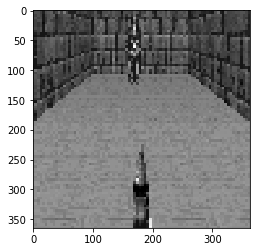

In [44]:
im = np.array(Image.open("Capture.png").convert("L"))
plt.imshow(im, cmap='gray')
plt.show()

In [45]:
min = np.min(im)
max = np.max(im)
print(min, max)

0 255


In [46]:
LUT = np.zeros(256, dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.uint8)
LUT

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

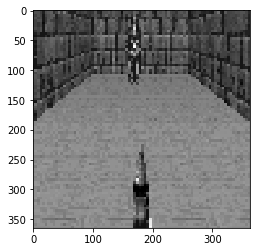

In [47]:
plt.imshow(LUT[im], cmap='gray')

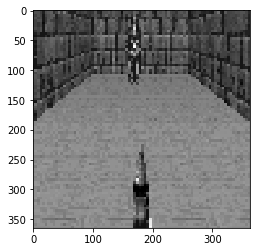

In [48]:
plt.imshow(im, cmap='gray')

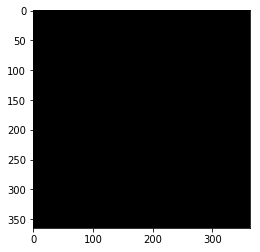

In [49]:
plt.imshow(im - LUT[im], cmap='gray')

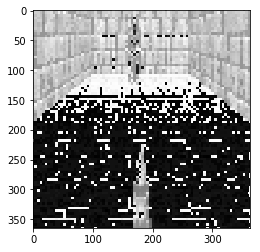

In [53]:
plt.imshow(im - 128, cmap='gray')

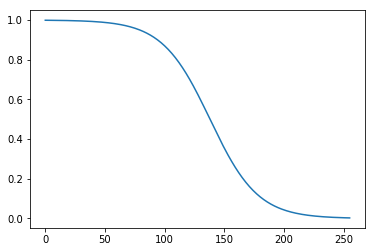

In [84]:
def sigm(X):
    return 1 / (1 + np.exp(0.05*(X - 138)))
y = sigm(np.arange(256))
plt.plot(np.arange(256), y)

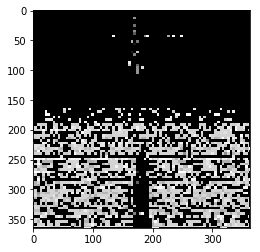

In [85]:
plt.imshow(sigm(im), cmap='gray')

In [91]:
np.array([[1, ] * 4, ] * 4)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [95]:
A[1:,...]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [108]:
A = np.zeros((4, 3, 3))
def np_deque(A, size):
    i = 1
    j = 0
    while i < 10:
        a = np.array([[i,] * size,] * size)

        A[:-1, ...] = A[1:, ...]
        A[-1, ...] = a
        j += 1
        if j == 4:
            j = 0
            i += 1

In [121]:
D = deque([np.zeros((3,3)) for i in range(4)], maxlen=4)
def _deque(D, size):
    i = 1
    j = 0
    while i < 10:
        a = np.array([[i,] * size,] * size)

        D.append(a)
        A = np.array(D)
        j += 1
        if j == 4:
            j = 0
            i += 1


In [115]:
size = 200
A = np.zeros((4, size, size))
D = deque([np.zeros((size,size)) for i in range(4)], maxlen=4)

In [119]:
%timeit -n100 np_deque(A, size)

85.3 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [122]:
%timeit -n100 _deque(D, size)

82.3 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
D

deque([array([[9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              ...,
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9]]), array([[9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              ...,
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9]]), array([[9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              ...,
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9]]), array([[9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              ...,
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9],
              [9, 9, 9, ..., 9, 9, 9]])])

In [2]:
class DQNetwork(nn.Module):

    def __init__(self):
        super(DQNetwork, self).__init__()
        """
            First Convolutional layer:
            Conv2d: Widht = [(Input width - Kernel width + 2 * Padding) / Stride] + 1
                => [(84 - 8 + 0) / 2] + 1 = 39 => 39 x 39 x 32
            BatchNormalization
        """
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=32, kernel_size=8, stride=2)
        self.batchnorm1 = nn.BatchNorm2d(num_features=32)

        """
            Second Convolutional layer:
            Conv2d: Output => [(38 - 4 + 0) / 2] + 1 = 18 => 18 x 18 x 64
            BatchNormalization
        """
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.batchnorm2 = nn.BatchNorm2d(num_features=64)

        """
            Third Convolutional layer:
            Conv2d: Output => [(18 - 4 + 0) / 2] + 1 = 8 => 8 x 8 x 128
            BatchNormalization
        """
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2)
        self.batchnorm3 = nn.BatchNorm2d(num_features=128)

        """
            First Fully Connected layer:
            Input size = 8 x 8 x 128 = 8192
        """
        self.fc1 = nn.Linear(in_features=8192, out_features=512)

        """
            Second Fully Connected layer = Output Layer
        """
        self.out = nn.Linear(in_features=512, out_features=3)

    def forward(self, x):
        # First Convolutional layer with ELU activation
        x = F.elu(self.batchnorm1(self.conv1(x)))

        # Second Convolutional layer with ELU activation
        x = F.elu(self.batchnorm2(self.conv2(x)))

        # Third Convolutional layer with ELU activation
        x = F.elu(self.batchnorm3(self.conv3(x)))

        # Flatten the output of the convolution
        x = x.view(-1, 8192)

        # First Fully Connected layer with ELU activation
        x = F.elu(self.fc1(x))

        # Output with the second fully connected layer
        return self.out(x)

In [3]:
dqn = DQNetwork().cuda()

In [11]:
from random import randint

hist = [randint(1, 1000) for i in range(317)]
print(hist)

a = [10 * x for x in range(0, int(len(hist) / 10) + 1)] + [len(hist) - 1]
a

[464, 624, 509, 228, 751, 284, 595, 581, 873, 831, 914, 251, 18, 367, 724, 331, 860, 328, 711, 4, 866, 833, 609, 890, 828, 675, 668, 474, 624, 426, 221, 873, 378, 72, 92, 339, 474, 254, 340, 702, 70, 229, 865, 199, 903, 877, 39, 987, 215, 138, 899, 994, 702, 446, 465, 145, 210, 226, 350, 152, 453, 928, 76, 81, 693, 945, 840, 661, 994, 952, 775, 807, 303, 610, 443, 635, 819, 401, 41, 477, 190, 211, 467, 442, 44, 981, 545, 852, 780, 666, 664, 32, 472, 33, 878, 658, 269, 263, 345, 874, 865, 487, 131, 334, 428, 583, 565, 711, 804, 563, 975, 825, 355, 195, 280, 276, 450, 373, 555, 308, 862, 705, 89, 220, 874, 85, 495, 37, 884, 543, 548, 72, 577, 808, 125, 638, 333, 463, 729, 114, 603, 546, 396, 884, 364, 248, 683, 420, 730, 37, 471, 886, 702, 654, 347, 184, 549, 83, 457, 661, 676, 511, 920, 625, 18, 502, 843, 230, 608, 788, 121, 940, 269, 363, 474, 433, 134, 891, 643, 805, 540, 875, 296, 275, 653, 730, 241, 331, 756, 973, 440, 85, 19, 915, 861, 558, 157, 615, 84, 626, 247, 605, 255, 694, 94

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 316]

In [17]:
print(hist[0:10])
sum(hist[0:10]) / len(hist[0:10])

[464, 624, 509, 228, 751, 284, 595, 581, 873, 831]


574.0

In [18]:
mov_avg = []
for i in range(1, len(a)):
    mov_avg.append(sum(hist[a[i - 1]:a[i]]) / len(hist[a[i - 1]:a[i]]))
mov_avg    

[574.0,
 450.8,
 689.3,
 374.5,
 452.2,
 458.9,
 662.3,
 531.1,
 517.8,
 448.8,
 547.1,
 459.2,
 479.4,
 440.7,
 491.1,
 499.4,
 572.1,
 507.3,
 567.0,
 436.0,
 527.9,
 420.1,
 478.8,
 723.0,
 431.5,
 295.0,
 638.0,
 511.0,
 433.3,
 512.3,
 439.3,
 576.6666666666666]

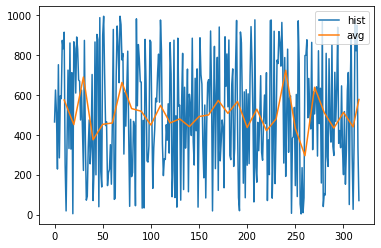

In [21]:
plt.plot(np.arange(len(hist)), hist, label='hist')
plt.plot(a[1:], mov_avg, label='avg')
plt.legend()
plt.show()